# Importing Libraries

In [1]:
# Automate the EDA process
!pip install ydata-profiling

# Realtime Chart
!pip install livelossplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00


In [2]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from livelossplot import PlotLossesKerasTF
from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from tensorflow.keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

# Basic Info About Data

In [3]:
df = pd.read_csv('/content/Insurance Costs.csv')
df.head()

,person_id,age,sex,bmi,children,smoker,region,total_charges
0,1,19.0,female,27.900,0,yes,southwest,16884.9240
1,2,18.0,male,33.770,1,no,southeast,1725.5522
2,3,28.0,male,33.000,3,no,southeast,4449.4620
3,4,33.0,male,22.705,0,no,northwest,21984.4700
4,5,32.0,male,28.880,0,no,northwest,3866.8552


In [4]:
df.tail()

,person_id,age,sex,bmi,children,smoker,region,total_charges
1333,1334,50.0,male,30.97,3,no,northwest,10600.5480
1334,1335,18.0,female,31.92,0,no,northeast,2205.9807
1335,1336,18.0,female,36.85,0,no,southeast,1629.8335
1336,1337,21.0,female,25.80,0,no,southwest,2007.9450
1337,1338,61.0,female,29.07,0,yes,northwest,29141.3600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_id      1338 non-null   int64  
 1   age            1337 non-null   float64
 2   sex            1338 non-null   object 
 3   bmi            1334 non-null   float64
 4   children       1338 non-null   int64  
 5   smoker         1337 non-null   object 
 6   region         1332 non-null   object 
 7   total_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [6]:
df.describe()

,person_id,age,bmi,children,total_charges
count,1338.000000,1337.000000,1334.000000,1338.000000,1338.000000
mean,669.500000,39.219147,30.659981,1.094918,13270.422274
std,386.391641,14.048217,6.100145,1.205493,12110.011244
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287000
50%,669.500000,39.000000,30.380000,1.000000,9382.032500
75%,1003.750000,51.000000,34.656250,2.000000,16639.912250
max,1338.000000,64.000000,53.130000,5.000000,63770.430000


In [7]:
df.isnull().sum()

,0
person_id,0
age,1
sex,0
bmi,4
children,0
smoker,1
region,6
total_charges,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop(columns=['person_id'])

# EDA

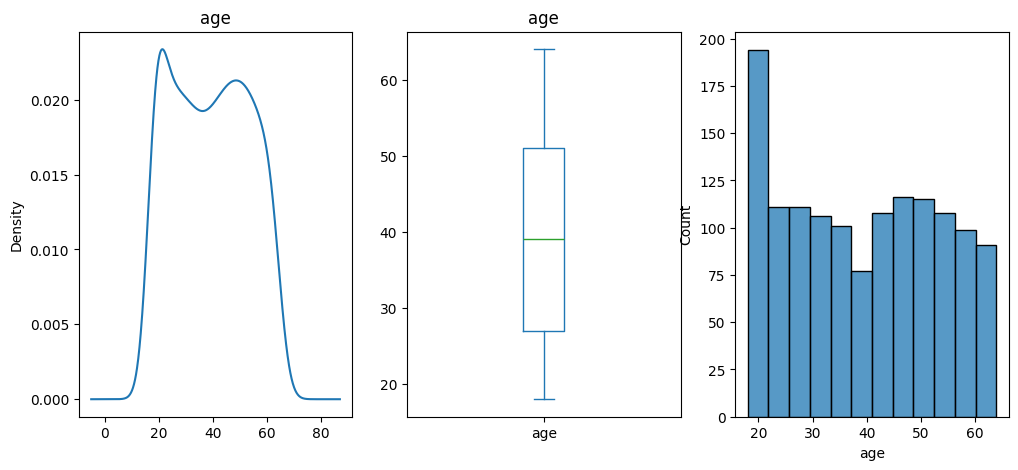

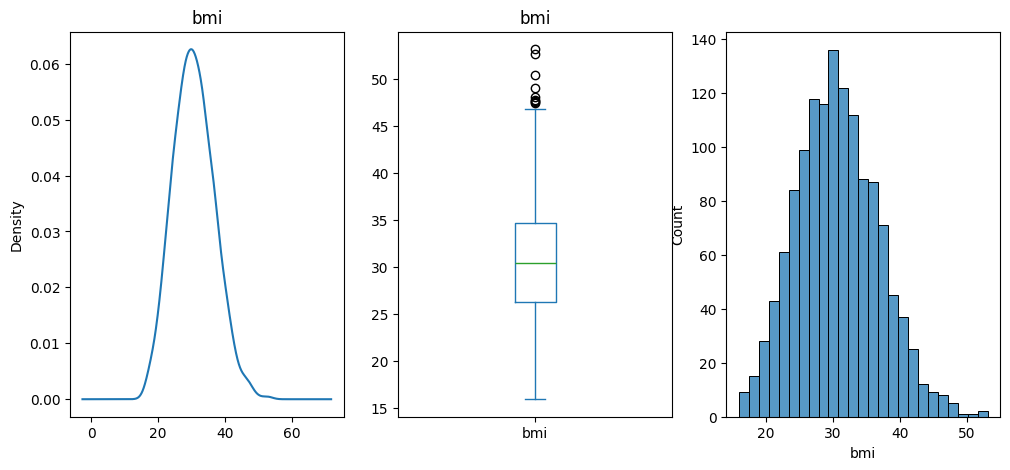

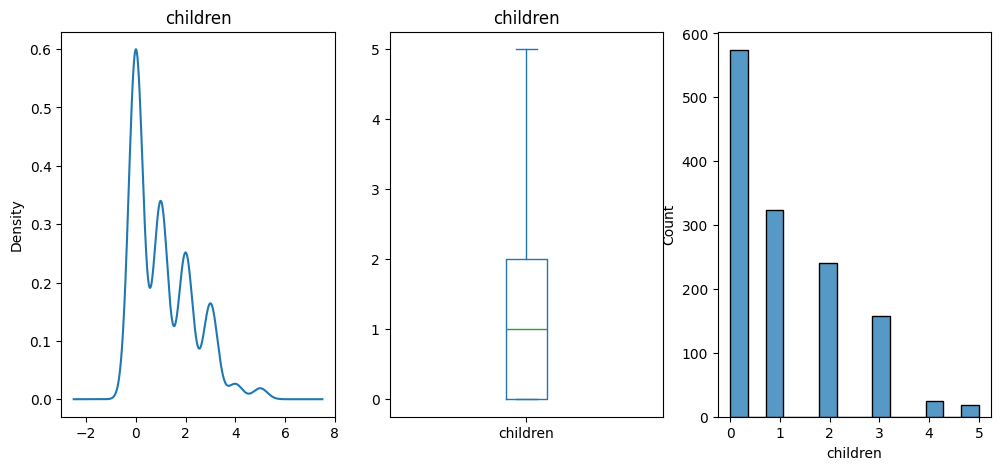

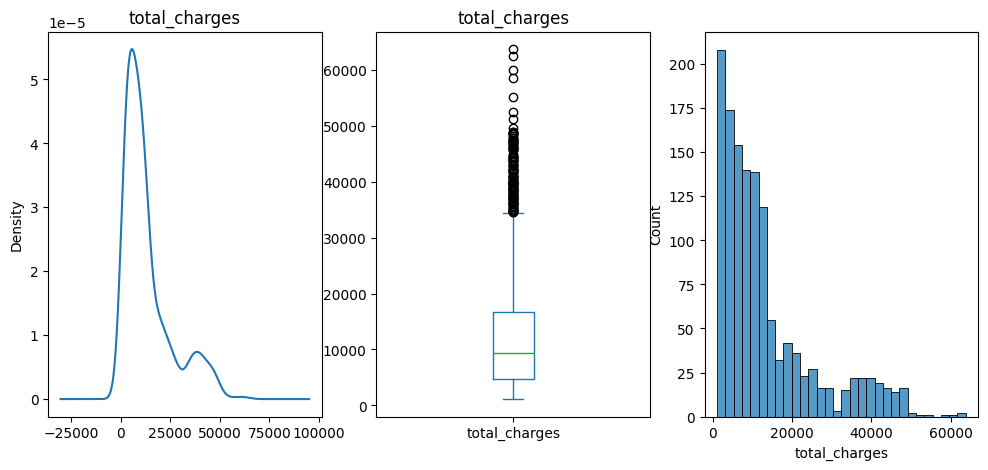

In [10]:
for col in df.columns:
  if df[col].dtype != 'object':
    fig , ax = plt.subplots(1,3,figsize=(12,5))

    df[col].plot(kind='kde',title=col , ax=ax[0]) # KDE plot to understand the distribution of the data
    df[col].plot(kind='box' , title=col , ax=ax[1]) # BOX plot to understand the quntiles and outliers in the data
    sns.histplot(df[col],ax=ax[2]) # hist plot to understand the range of data
    plt.show()

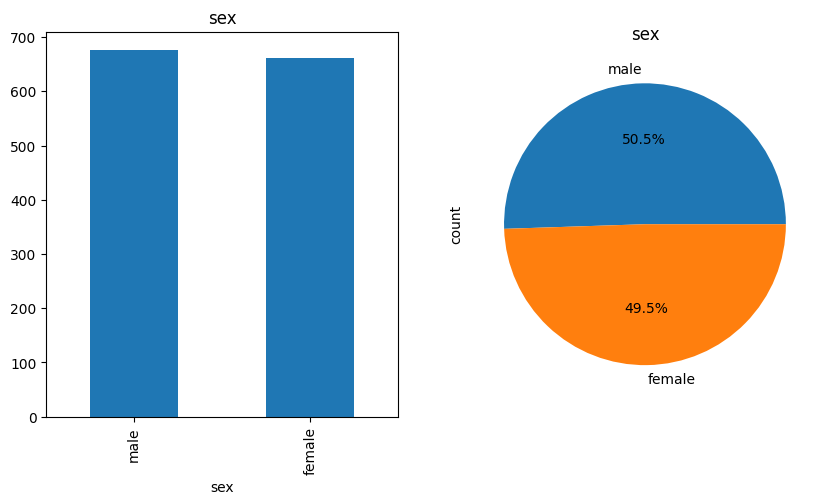

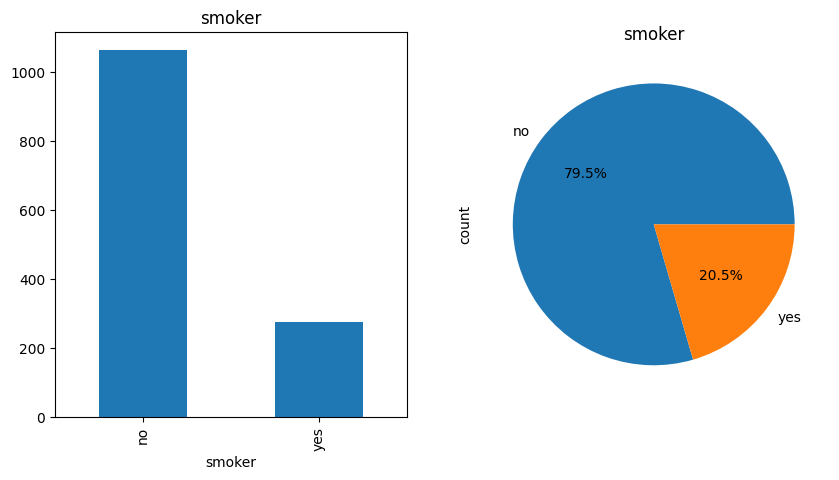

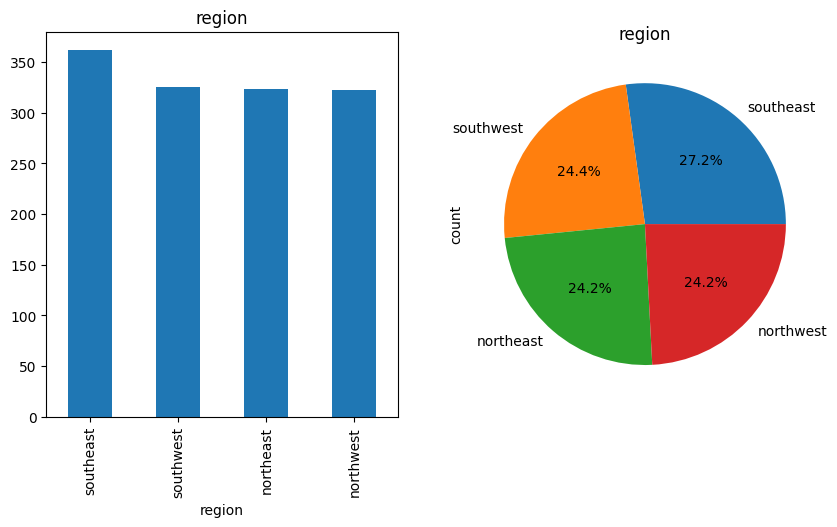

In [11]:
for col in df.columns:
  if df[col].dtype == 'object':
    fig , ax = plt.subplots(1,2,figsize=(10,5))

    df[col].value_counts().plot(kind='bar',title=col , ax=ax[0]) # Bar plot to understand the distribution of categories in the data
    df[col].value_counts().plot(kind='pie',title=col , ax=ax[1] , autopct='%0.1f%%') # Pie plot to understand the percentage of each categories
    plt.show()

# Y-Data Profiling

In [12]:
Profile = ProfileReport(df,title="EDA Report",explorative=True)

In [13]:
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 31.87it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Missing Values Handling

In [14]:
df['age'] = df['age'].fillna(df['age'].median()) # Filling missing values with median

In [15]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median()) # Filling missing values with median

In [16]:
# Filling missing values with most frequent value
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df['region'] = df['region'].fillna(df['region'].mode()[0])

In [17]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
total_charges,0


# Train Test Split

In [18]:
X = df.drop(columns=['total_charges'])
y = df['total_charges']

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# Data Proprocessing

In [20]:
# applying scaling on age and bmi
std = StandardScaler()
X_train[['age', 'bmi']] = std.fit_transform(X_train[['age', 'bmi']])
X_test[['age', 'bmi']]  = std.transform(X_test[['age', 'bmi']])

In [21]:
# applying label encoding on sex , smoker and region
le_sex = LabelEncoder()
X_train['sex'] = le_sex.fit_transform(X_train['sex'])
X_test['sex']  = le_sex.transform(X_test['sex'])

le_smoker = LabelEncoder()
X_train['smoker'] = le_smoker.fit_transform(X_train['smoker'])
X_test['smoker']  = le_smoker.transform(X_test['smoker'])

le_region = LabelEncoder()
X_train['region'] = le_region.fit_transform(X_train['region'])
X_test['region']  = le_region.transform(X_test['region'])

# Perceptron

In [22]:
perceptron = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))
])

In [23]:
perceptron.compile(
    optimizer='sgd',
    loss='mse',
    metrics=['mae']
)

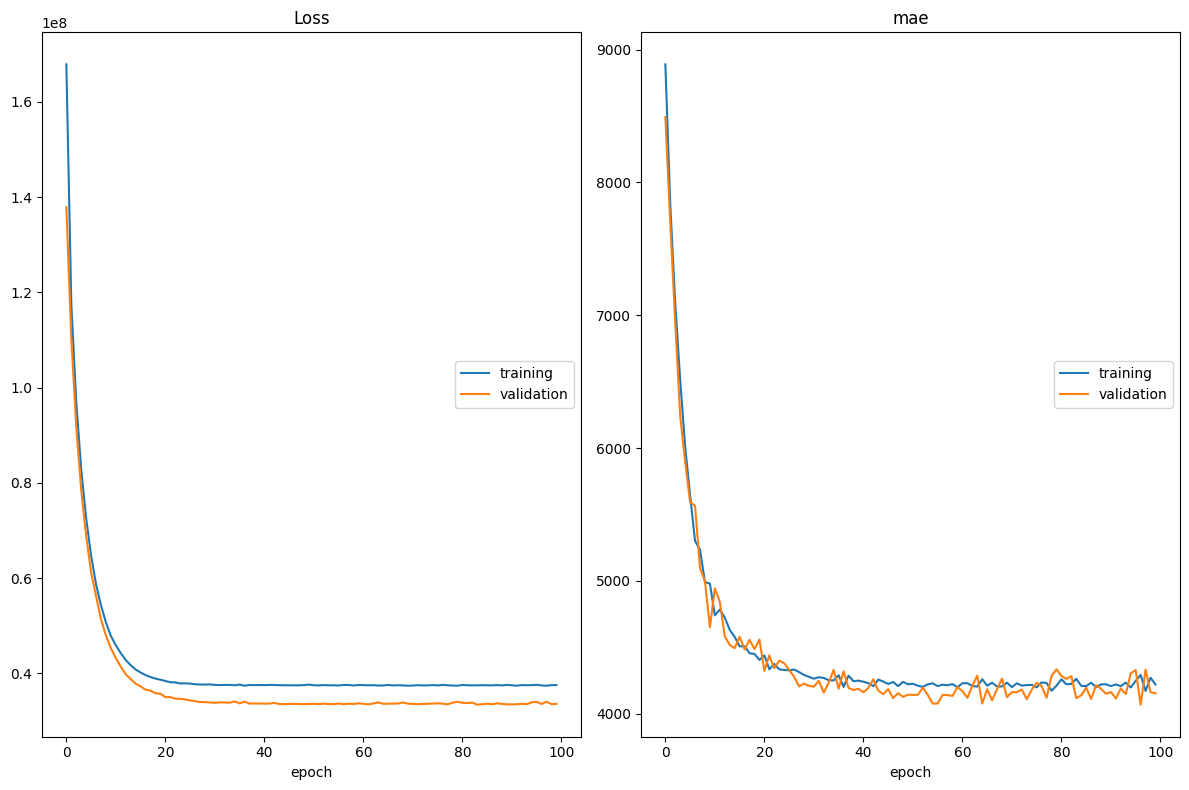

Loss
	training         	 (min: 37429252.000, max: 167841984.000, cur: 37560868.000)
	validation       	 (min: 33450088.000, max: 137861760.000, cur: 33628984.000)
mae
	training         	 (min: 4170.738, max: 8889.588, cur: 4219.265)
	validation       	 (min: 4067.265, max: 8492.244, cur: 4153.750)


In [24]:
history_p = perceptron.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    callbacks=[PlotLossesKerasTF()],
    epochs=100,
    verbose=0
)

In [25]:
y_pred_p = perceptron.predict(X_test).flatten()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [26]:
print("Perceptron Model")
print("MAE :", mean_absolute_error(y_test, y_pred_p))
print("MSE:", mean_squared_error(y_test, y_pred_p))
print("R2  :", r2_score(y_test, y_pred_p))

Perceptron Model
MAE : 4153.750031634795
MSE: 33628982.0561137
R2  : 0.7833864283814242


# MultiLayer Perceptron

In [27]:
mlp = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)  # regression output
])

In [28]:
mlp.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

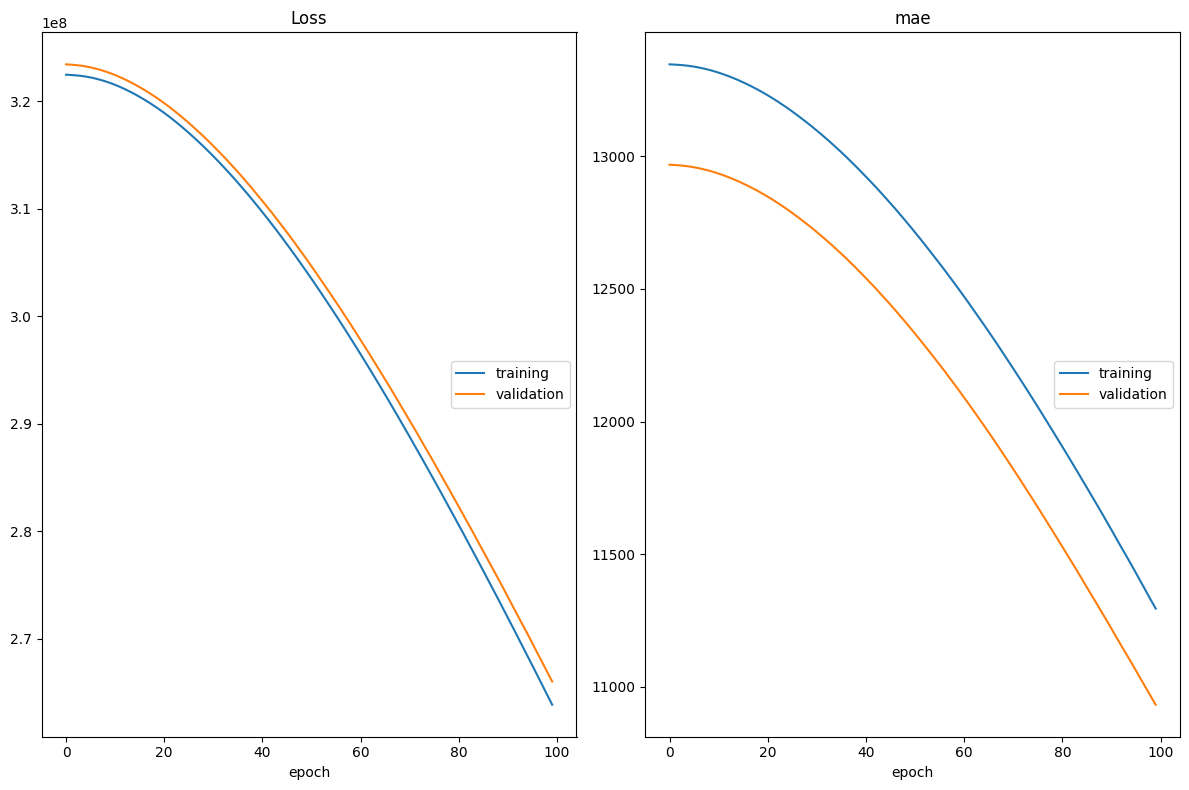

Loss
	training         	 (min: 263875552.000, max: 322455168.000, cur: 263875552.000)
	validation       	 (min: 266028448.000, max: 323415904.000, cur: 266028448.000)
mae
	training         	 (min: 11295.499, max: 13346.159, cur: 11295.499)
	validation       	 (min: 10933.135, max: 12967.936, cur: 10933.135)


In [29]:
mlp.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[PlotLossesKerasTF()],
    verbose=0
)

In [30]:
y_pred_mlp = mlp.predict(X_test).flatten()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [31]:
print("MLP Model (1 Hidden Layer)")
print("MAE :", mean_absolute_error(y_test, y_pred_mlp))
print("MSE:", mean_squared_error(y_test, y_pred_mlp))
print("R2  :", r2_score(y_test, y_pred_mlp))

MLP Model (1 Hidden Layer)
MAE : 10933.133948759412
MSE: 266028431.05441254
R2  : -0.713562679555034


# Deep Neural Network (DNN)

In [32]:
dnn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

In [33]:
dnn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

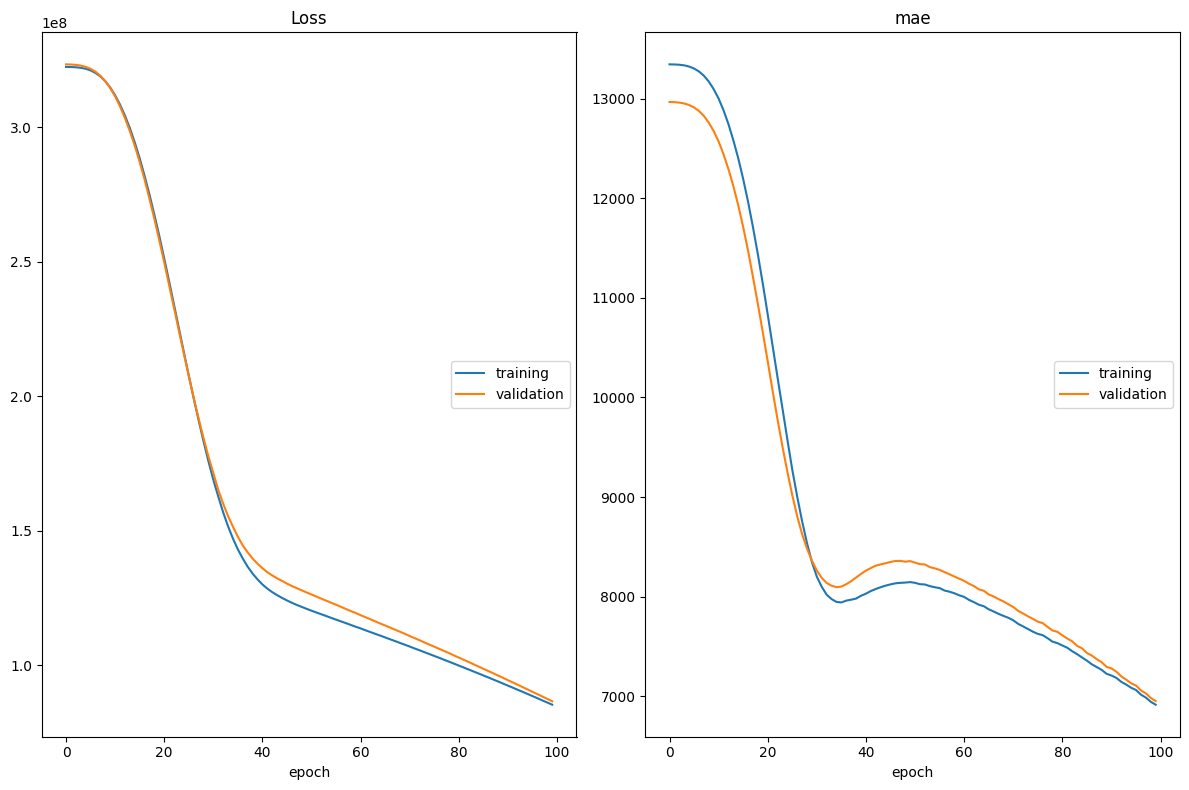

Loss
	training         	 (min: 85396952.000, max: 322440480.000, cur: 85396952.000)
	validation       	 (min: 86675760.000, max: 323400768.000, cur: 86675760.000)
mae
	training         	 (min: 6914.484, max: 13345.729, cur: 6914.484)
	validation       	 (min: 6951.182, max: 12967.505, cur: 6951.182)


In [34]:
history_dnn = dnn.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[PlotLossesKerasTF()],
    verbose=0
)

In [35]:
y_pred_dnn = dnn.predict(X_test).flatten()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [36]:
print("DNN Model (Multiple Hidden Layers)")
print("MAE :", mean_absolute_error(y_test, y_pred_dnn))
print("MSE:", mean_squared_error(y_test, y_pred_dnn))
print("R2  :", r2_score(y_test, y_pred_dnn))

DNN Model (Multiple Hidden Layers)
MAE : 6951.182880398605
MSE: 86675759.13172434
R2  : 0.4416974701480474


In [37]:
dnn1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [38]:
dnn1.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

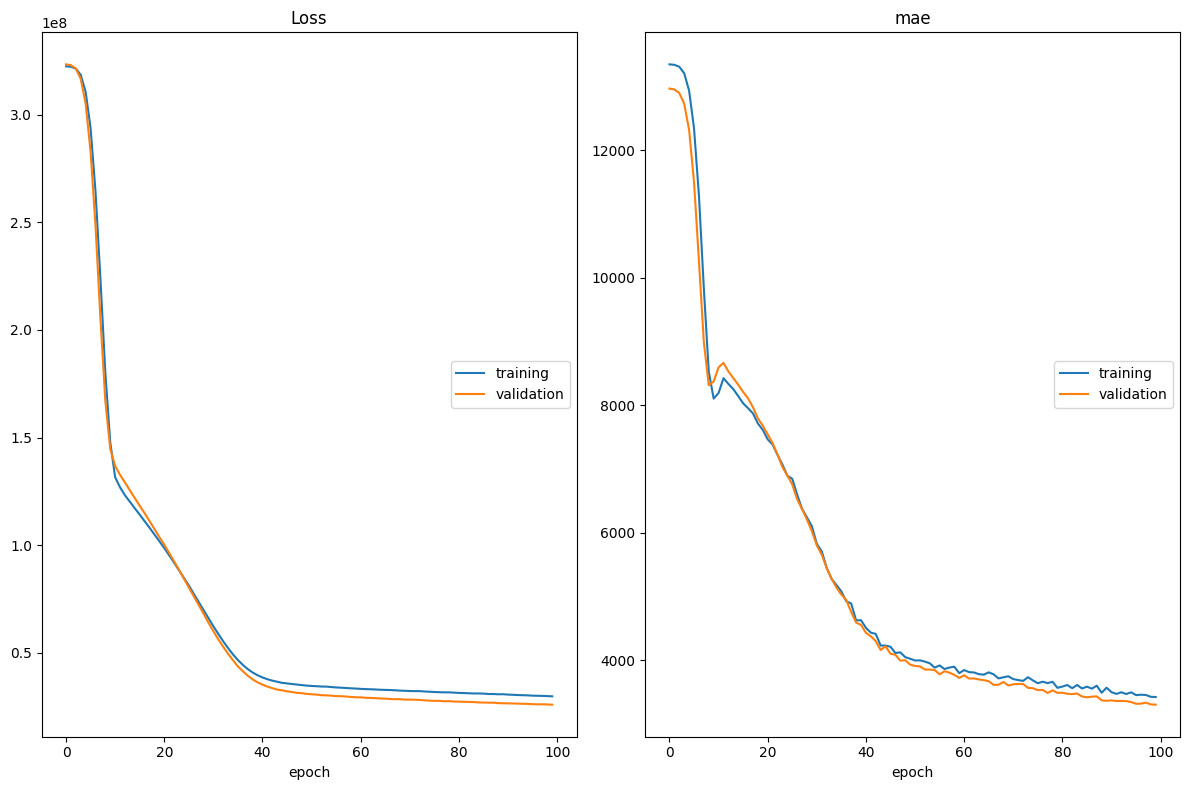

Loss
	training         	 (min: 29874238.000, max: 322416544.000, cur: 29874238.000)
	validation       	 (min: 25989424.000, max: 323335424.000, cur: 25989424.000)
mae
	training         	 (min: 3426.972, max: 13344.839, cur: 3426.972)
	validation       	 (min: 3306.274, max: 12964.949, cur: 3306.274)


In [39]:
history_dnn1 = dnn1.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[PlotLossesKerasTF()],
    verbose=0
)

In [40]:
y_pred_dnn1 = dnn1.predict(X_test).flatten()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [41]:
print("DNN Model (Multiple Hidden Layers)")
print("MAE :", mean_absolute_error(y_test, y_pred_dnn1))
print("MSE:", mean_squared_error(y_test, y_pred_dnn1))
print("R2  :", r2_score(y_test, y_pred_dnn1))

DNN Model (Multiple Hidden Layers)
MAE : 3306.2739189555155
MSE: 25989425.624799944
R2  : 0.832594923643257


#  Provide comparative analysis


This experiment compares different neural network architectures for insurance cost prediction.
Models evaluated include a Perceptron, a shallow ANN, and multiple Deep Neural Networks (DNNs).
Performance is compared using training and validation loss (Mean Squared Error).

 1) Perceptron Model Analysis:
    - The perceptron is a single-layer neural network and acts as a linear regressor.
    - Due to the absence of hidden layers, it fails to capture non-linear relationships
    - present in the insurance dataset (e.g., interaction between age, BMI, and smoking).
    - High training and validation loss indicate severe underfitting.

 2) Shallow ANN Analysis:
    - This model introduces a hidden layer, allowing limited non-linear learning.
    - Compared to the perceptron, both training and validation loss are reduced.
    - However, the loss values are still high, indicating that the model capacity is insufficient to fully learn complex feature interactions.

 3) DNN Example 1 Analysis:
    - This deep neural network contains multiple hidden layers, significantly increasing model capacity.
    - A sharp reduction in both training and validation loss is observed.
    - The close proximity of training and validation loss indicates good generalization and minimal overfitting.

 4) DNN Example 2 Analysis:
    - It achieves the lowest training and validation loss among all models.
    - The consistently decreasing validation loss suggests stable learning and effective capture of non-linear patterns in the data.
    - This model is selected as the final best-performing model.



In [42]:
results_models = pd.DataFrame({
    'Model': ['Perceptron', 'MLP (1 Hidden Layer)', 'DNN' , 'DNN 1'],
    'MAE': [
        mean_absolute_error(y_test, y_pred_p),
        mean_absolute_error(y_test, y_pred_mlp),
        mean_absolute_error(y_test, y_pred_dnn),
        mean_absolute_error(y_test, y_pred_dnn1)
    ],
    'MSE': [
        mean_squared_error(y_test, y_pred_p),
        mean_squared_error(y_test, y_pred_mlp),
        mean_squared_error(y_test, y_pred_dnn),
        mean_squared_error(y_test, y_pred_dnn1)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_p),
        r2_score(y_test, y_pred_mlp),
        r2_score(y_test, y_pred_dnn),
        r2_score(y_test, y_pred_dnn1)
    ]
})

results_models


,Model,MAE,MSE,R2 Score
0,Perceptron,4153.750032,3.362898e+07,0.783386
1,MLP (1 Hidden Layer),10933.133949,2.660284e+08,-0.713563
2,DNN,6951.182880,8.667576e+07,0.441697
3,DNN 1,3306.273919,2.598943e+07,0.832595


# Experiment with Epochs

In [43]:
epoch_results = []

for ep in [20 , 50, 100, 200]:
    dnn_epoch = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    dnn_epoch.compile(optimizer='adam', loss='mse')

    dnn_epoch.fit(
        X_train, y_train,
        epochs=ep,
        validation_split=0.2,
        verbose=0
    )

    y_pred_ep = dnn_epoch.predict(X_test).flatten()

    epoch_results.append([
        ep,
        mean_absolute_error(y_test, y_pred_ep),
        mean_squared_error(y_test, y_pred_ep),
        r2_score(y_test, y_pred_ep)
    ])


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [44]:
epoch_comparison = pd.DataFrame(
    epoch_results,
    columns=['Epochs', 'MAE', 'MSE', 'R2 Score']
)

epoch_comparison

,Epochs,MAE,MSE,R2 Score
0,20,8038.217358,1.148237e+08,0.260389
1,50,5524.293692,5.453199e+07,0.648744
2,100,3676.740174,2.884572e+07,0.814197
3,200,3053.071425,2.435334e+07,0.843133


# Save the ANN model

In [47]:
dnn1.save('insurance_cost_ann_model.h5')

In [49]:
best_model = load_model(
    'insurance_cost_ann_model.h5',
    compile=False
)

y_pred_final = best_model.predict(X_test).flatten()

print("Final Loaded ANN Model Performance")
print("MAE :", mean_absolute_error(y_test, y_pred_final))
print("MSE :", mean_squared_error(y_test, y_pred_final))
print("R2  :", r2_score(y_test, y_pred_final))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Final Loaded ANN Model Performance
MAE : 3306.2739189555155
MSE : 25989425.624799944
R2  : 0.832594923643257
